In [1]:
# download data from
# https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

In [3]:
import os
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
images = []
labels = []

size = (50, 50)
folders = glob.glob("images/*")

for folder in folders:
    animal_type = folder.split('\\')[-1]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))

        if img is None:
            continue
        img = cv2.resize(img, dsize=size)
        images.append(img)
        
        if (animal_type == "Cat"):
           labels.append(0)
        elif (animal_type == "Dog"):
           labels.append(1)

In [30]:
len(labels) == len(images)

True

In [31]:
train_feature, test_feature, train_label, test_label = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [32]:
# convert from list into matrix
train_feature = np.array(train_feature)
test_feature = np.array(test_feature)
train_label = np.array(train_label)
test_label = np.array(test_label)
print("The shape of train_feature: ", train_feature.shape, ", the shape of train_label: ", train_label.shape)
print("The shape of test_feature: ", test_feature.shape, ", the shape of test_label: ", test_label.shape)

The shape of train_feature:  (19956, 50, 50, 3) , the shape of train_label:  (19956,)
The shape of test_feature:  (4990, 50, 50, 3) , the shape of test_label:  (4990,)


In [33]:
dataset_path = "Cat_Dog_Dataset/"
if not os.path.exists(imagesavepath):
    os.makedirs(imagesavepath)
np.save(f'{dataset_path}train_feature.npy', train_feature)
np.save(f'{dataset_path}test_feature.npy', test_feature)
np.save(f'{dataset_path}train_label.npy', train_label)
np.save(f'{dataset_path}test_label.npy', test_label)

In [6]:
dataset_path = "Cat_Dog_Dataset/"
train_feature = np.load(dataset_path + "train_feature.npy")
test_feature = np.load(dataset_path + "test_feature.npy")
train_label = np.load(dataset_path + "train_label.npy")
test_label = np.load(dataset_path + "test_label.npy")

In [7]:
train_feature_vector = train_feature.reshape(len(train_feature), 50, 50, 3).astype("float32")
test_feature_vector = test_feature.reshape(len(test_feature), 50, 50, 3).astype("float32")

In [8]:
train_feature_normalize = train_feature_vector / 255
test_feature_normalize = test_feature_vector / 255

In [9]:
# covert the labels into onehot code
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

In [10]:
train_feature_normalize.shape

(19956, 50, 50, 3)

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same", input_shape = (50, 50, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

# construct MLP
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

In [12]:
# set train mode
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [13]:
train_feature_normalize.shape

(19956, 50, 50, 3)

In [14]:
# early stop
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True,
                               verbose=1)
# start training model
train_history = model.fit(x=train_feature_normalize, y=train_label_onehot,
              validation_split=0.2, callbacks=[early_stopping], epochs=100, batch_size=200, verbose=2)

Epoch 1/100
80/80 - 5s - loss: 0.6785 - accuracy: 0.5620 - val_loss: 0.6328 - val_accuracy: 0.6641 - 5s/epoch - 60ms/step
Epoch 2/100
80/80 - 1s - loss: 0.6124 - accuracy: 0.6576 - val_loss: 0.5996 - val_accuracy: 0.7012 - 603ms/epoch - 8ms/step
Epoch 3/100
80/80 - 1s - loss: 0.5622 - accuracy: 0.7102 - val_loss: 0.5589 - val_accuracy: 0.7182 - 603ms/epoch - 8ms/step
Epoch 4/100
80/80 - 1s - loss: 0.5260 - accuracy: 0.7377 - val_loss: 0.5138 - val_accuracy: 0.7503 - 602ms/epoch - 8ms/step
Epoch 5/100
80/80 - 1s - loss: 0.4869 - accuracy: 0.7649 - val_loss: 0.4923 - val_accuracy: 0.7520 - 606ms/epoch - 8ms/step
Epoch 6/100
80/80 - 1s - loss: 0.4611 - accuracy: 0.7828 - val_loss: 0.4659 - val_accuracy: 0.7751 - 605ms/epoch - 8ms/step
Epoch 7/100
80/80 - 1s - loss: 0.4327 - accuracy: 0.7993 - val_loss: 0.4302 - val_accuracy: 0.8026 - 608ms/epoch - 8ms/step
Epoch 8/100
80/80 - 1s - loss: 0.4074 - accuracy: 0.8135 - val_loss: 0.4264 - val_accuracy: 0.8104 - 606ms/epoch - 8ms/step
Epoch 9/10

In [15]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("Accuracy: ", scores[1])

156/156 [==============================] - 1s 3ms/step - loss: 0.3504 - accuracy: 0.8495
Accuracy:  0.849498987197876


In [16]:
import matplotlib.pyplot as plt

# show images and the correctness of predictions in a table
def display_predictions(images, labels, predictions, num=15):
    category = {0: 'cat', 1: 'dog'}
    plt.gcf().set_size_inches(15, 15)
    for i in range(0, num):
        ax = plt.subplot(3, 5, i + 1)
        ax.imshow(images[i])
    
        title = "prediction = " + category[predictions[i]]
        title += "\nlabel = " + category[labels[i]]
          
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

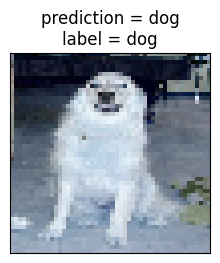

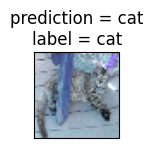

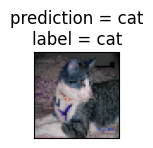

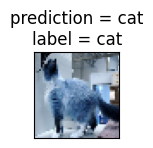

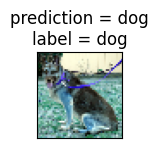

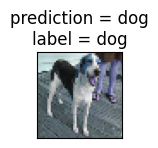

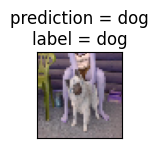

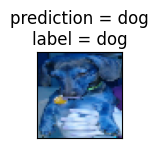

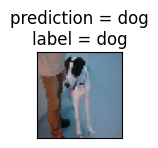

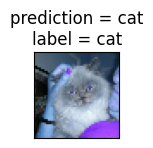

In [17]:
# predict the test set
prediction = model.predict(test_feature_normalize)
prediction = np.argmax(prediction, axis = 1)

# show the result
display_predictions(test_feature, test_label, prediction)